# **RFM Customer Segmentation Analysis**

In [3]:

import pandas as pd
import numpy as np 
import time
import datetime as dt

import re

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')

start = time.time()

import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_excel("Customer_Online_Transaction_data.xlsx" ,dtype={"customer_id":str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [13]:
print("Name Of Each Column \n")

i=0
for column_name in df.columns:
    i +=1
    print(f'{i}.',column_name)

Name Of Each Column 

1. InvoiceNo
2. StockCode
3. Description
4. Quantity
5. InvoiceDate
6. UnitPrice
7. CustomerID
8. Country


In [8]:
df.rename(index=str,
         columns={"InvoiceNo":"invoice_no",
                 "StockCode":"stock_code",
                 "Description":"description",
                 "Quantity":"quantity",
                 "InvoiceDate":"invoice_date",
                 "UnitPrice":"unit_price",
                 "CustomerID":"customer_id",
                 "Country":"country"},inplace=True)

In [9]:
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [10]:
print("Shape  OF Our Dataset:",df.shape)

Shape  OF Our Dataset: (541909, 8)


In [12]:
print("Some Information of Our dataset:")

df.info

Some Information of Our dataset:


<bound method DataFrame.info of        invoice_no stock_code                          description  quantity  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587      22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587      23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   

              invoi

## **data Cleaning**

In [13]:
#checking Null Values
df.isnull().values.any()

True

In [14]:
df.isnull()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [16]:
#to see percentage of missing data

print("The percentage of missing data :\n")

missing=((df.isnull().sum()/df.shape[0])*100).round(2)
missing

The percentage of missing data :



invoice_no       0.00
stock_code       0.00
description      0.27
quantity         0.00
invoice_date     0.00
unit_price       0.00
customer_id     24.93
country          0.00
dtype: float64

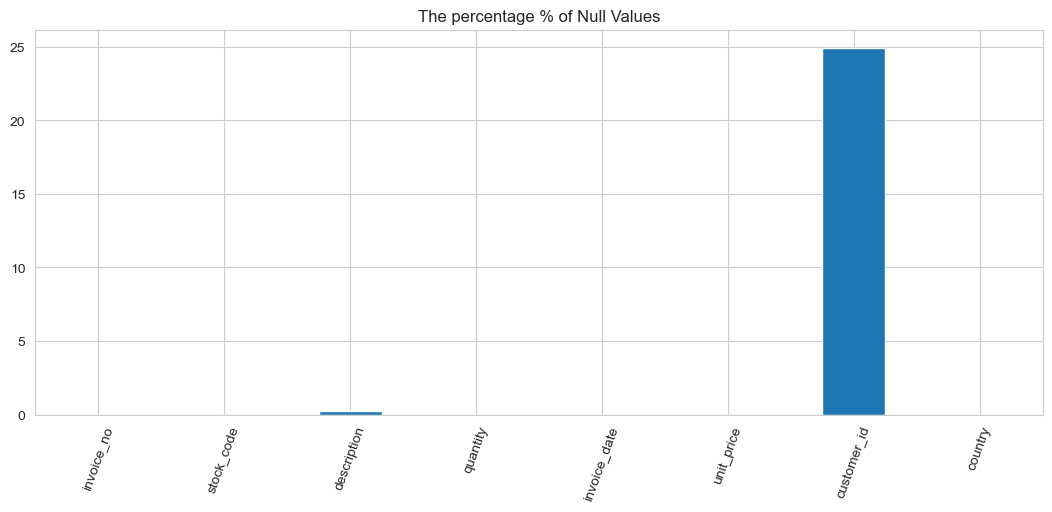

In [17]:
fig,ax = plt.subplots( figsize=(13,5))
((df.isnull().sum() / len(df))*100).plot.bar(ax=ax,rot= 70)
ax.set_title('The percentage % of Null Values')
plt.show()

In [18]:
# Clean Null Values
df.dropna(inplace=True)
print("Null  value After Cleaning:",df.isnull().sum().sum())

Null  value After Cleaning: 0


In [19]:
#checking duplicate value

check_duplicate=df.duplicated().sum()
print("Duplicate Value is:",check_duplicate)

Duplicate Value is: 5225


In [20]:
# view first 15 duplicate rows

df[df.duplicated()].head(15)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


In [21]:
# clear duplicate value

df.drop_duplicates(inplace=True,keep="first")
print(df.shape)
print("Duplicated Value After Cleaning:",df.duplicated().sum().sum())

(401604, 8)
Duplicated Value After Cleaning: 0


In [22]:
# check datatype

df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
dtype: object

In [23]:
# now we can chenge invoice date format

df["invoice_date"]=pd.to_datetime(df["invoice_date"])
df["invoice_date"].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: invoice_date, dtype: datetime64[ns]

In [24]:
#here we can take start date and last date

print("Start Date:",format(df["invoice_date"].min()))
print("last Date:",format(df["invoice_date"].max()))

Start Date: 2010-12-01 08:26:00
last Date: 2011-12-09 12:50:00


In [25]:
end_date=df["invoice_date"].min()
present_date=df["invoice_date"].max()

print("Present date Is :",present_date)

Present date Is : 2011-12-09 12:50:00


## **Data  Explore**

In [26]:
# how many check country
print("All Country Name Is Follows:")
df["country"].value_counts().reset_index()

All Country Name Is Follows:


,index,country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [27]:
# Check Total Country

print("Total Country :",len(df["country"].unique()))

Total Country : 37


In [28]:
#check How Many Customer in country

country_=df[["customer_id","country"]]
country_.groupby(["country"]).agg({"customer_id":"count"}).sort_values("customer_id",ascending=False).reset_index()

,country,customer_id
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


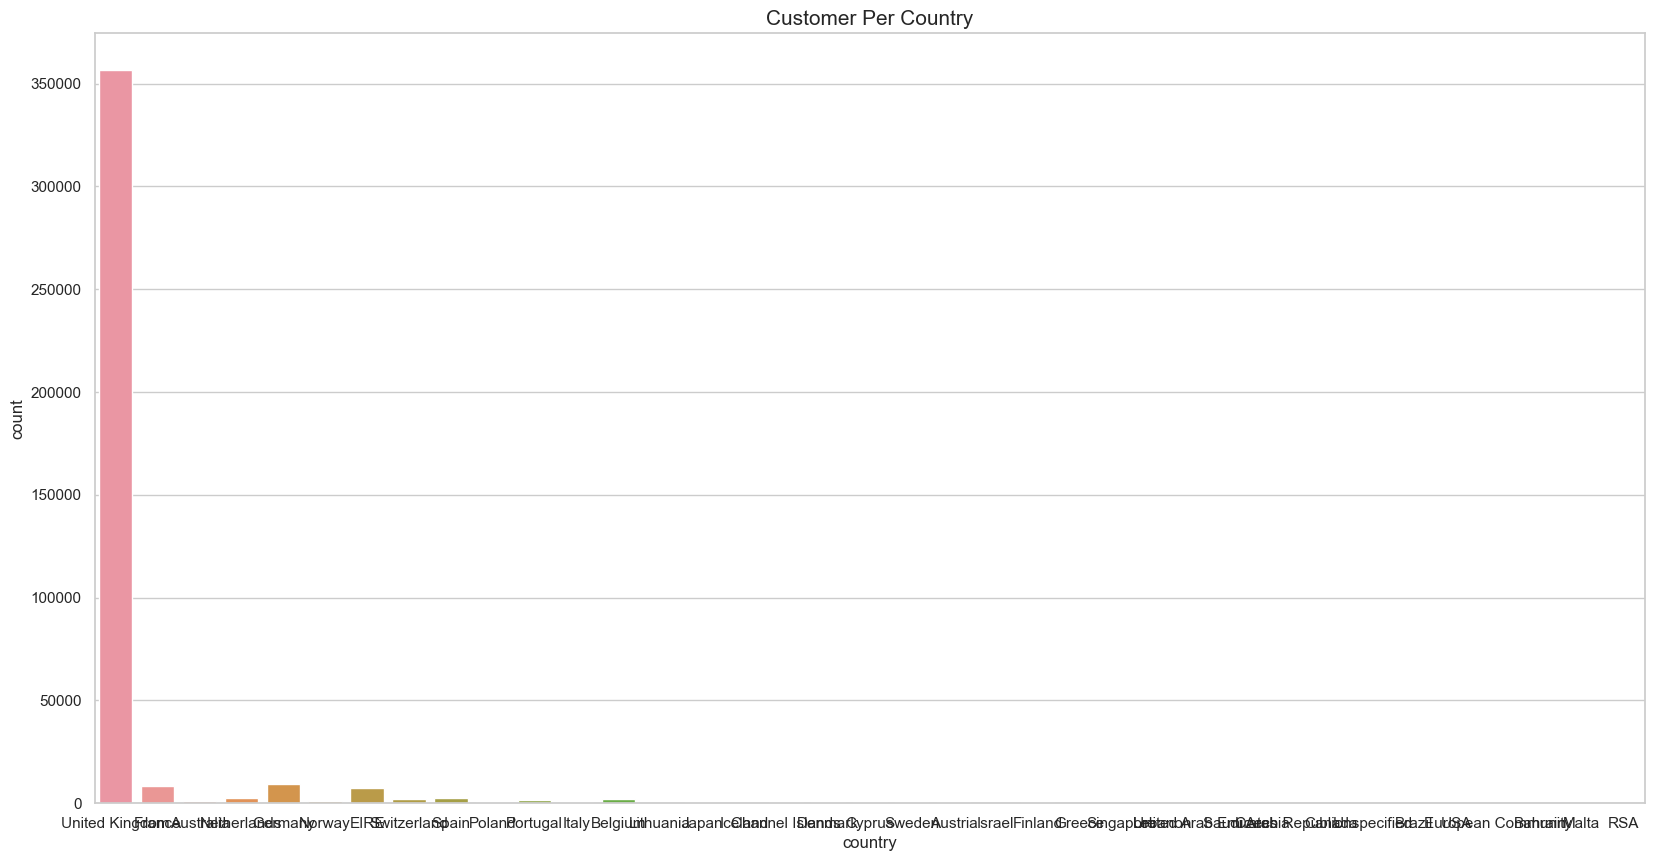

In [29]:
#set theme

sns.set_theme(style="whitegrid")

#set plot

plt.subplots(figsize=(20,10))

#plot countplot

sns.countplot(x="country",data=country_)
plt.title("Customer Per Country",fontsize=15)

plt.show()

In [30]:
#now we find which country place most order

df[["invoice_no","country"]].groupby("country").count().sort_values("invoice_no",ascending=False).reset_index()

,country,invoice_no
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


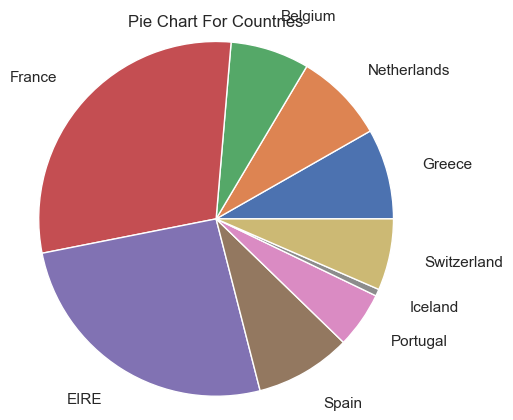

In [31]:
#ceating Pie chart for Country

country = ['Greece','Netherlands', 'Belgium', 'France' , 'EIRE', 'Spain' , 'Portugal', 'Iceland','Switzerland']
invoice = [2363,2355, 2060, 8443 ,7419 ,2508 ,1466,181,1866]


plt.pie(invoice,labels=country,radius=1.2,labeldistance=1.2)
plt.title("Pie Chart For Countries")
plt.show()

In [32]:
df.describe().round(2)

,quantity,unit_price,customer_id
count,401604.00,401604.00,401604.00
mean,12.18,3.47,15281.16
std,250.28,69.76,1714.01
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13939.00
50%,5.00,1.95,15145.00
75%,12.00,3.75,16784.00
max,80995.00,38970.00,18287.00


In [33]:
#find How Mnay unique product

for i in df.columns:
    print(f'{i}: {df[i].nunique()} items')

invoice_no: 22190 items
stock_code: 3684 items
description: 3896 items
quantity: 436 items
invoice_date: 20460 items
unit_price: 620 items
customer_id: 4372 items
country: 37 items


In [34]:
df["stock_code"].value_counts().head()

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
Name: stock_code, dtype: int64

In [35]:
#find Top Five Products 

print("These are top five We have")

top_=df.groupby("stock_code")["description"].value_counts().sort_values(ascending=False)
top_.head(5)

These are top five We have


stock_code  description                       
85123A      WHITE HANGING HEART T-LIGHT HOLDER    2058
22423       REGENCY CAKESTAND 3 TIER              1894
85099B      JUMBO BAG RED RETROSPOT               1659
47566       PARTY BUNTING                         1409
84879       ASSORTED COLOUR BIRD ORNAMENT         1405
Name: description, dtype: int64

In [36]:
#Find Most Orderd Products

print("Most Ordered Product is :")

most_=df.groupby("description")["quantity"].sum().sort_values(ascending=False)
most_.head(10)

Most Ordered Product is :


description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: quantity, dtype: int64

In [37]:
# Find Which Products Not Ordered Most

print("The Products Which is Not orderd most is:")

not_orderd=df.groupby("description")["quantity"].sum().sort_values(ascending=False)
not_orderd.tail(5)

The Products Which is Not orderd most is:


description
PINK POODLE HANGING DECORATION          -12
CRUK Commission                         -16
ASSORTED TUTTI FRUTTI ROUND BOX         -24
Discount                              -1194
ROTATING SILVER ANGELS T-LIGHT HLDR   -1475
Name: quantity, dtype: int64

## **Cancelled Order & Quanity**

In [38]:
cancle=(df["invoice_no"].str.contains("C",na=False).sum())

print("Total Orderd Cancelled Is :",cancle)

Total Orderd Cancelled Is : 8872


In [39]:
#Find Percentage of cancelled order

per_can=((cancle/df.shape[0])*100).round(2)

print(f"Percentage of cancle Order is:{per_can} %")

Percentage of cancle Order is:2.21 %


In [40]:
# Check any negative Value is present or not


if (df["quantity"]<0).any():
    negative="Yes"
    print("Is There Negative value Present:",negative)
        

Is There Negative value Present: Yes


In [41]:
#check negative Quantity In database

negative=df[df["quantity"]<0].value_counts().sum()
print("Total number of Negative Value Is:",negative)

Total number of Negative Value Is: 8872


In [42]:
df.shape

(401604, 8)

## **Calculation Of RFM**


* Recency : the number of days between today date and the last purchase date of this customer

* Frequency : the number of purchase of this customer

* Monetary : sum of TotalPrice of this customer

In [43]:
#firstly create new Column

df["total_Price"]=df["quantity"]*df["unit_price"]
df.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
df.sort_values("total_Price",ascending=False).head().reset_index()

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_Price
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
2,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
3,173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
4,348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72


In [45]:
#Find The how many product sold By Country

product_sold=df.groupby("country")["total_Price"].count().sort_values(ascending=False)
print("Total Product Sold By Country is follows:\n",product_sold.head(10))

Total Product Sold By Country is follows:
 country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: total_Price, dtype: int64


In [46]:
#find which country sold less product

product_s=df.groupby("country")["total_Price"].count().sort_values(ascending=False)

print("The less product  sell countries is follows:\n",product_s.tail(10))

The less product  sell countries is follows:
 country
Malta                   127
United Arab Emirates     68
European Community       61
RSA                      58
Lebanon                  45
Lithuania                35
Brazil                   32
Czech Republic           30
Bahrain                  17
Saudi Arabia             10
Name: total_Price, dtype: int64


**Create RFM Table**

In [47]:
new=df[["quantity","unit_price","total_Price"]]
new.head(10)

,quantity,unit_price,total_Price
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
5,2,7.65,15.30
6,6,4.25,25.50
7,6,1.85,11.10
8,6,1.85,11.10
9,32,1.69,54.08


In [48]:
# Aggregate at customer level
customer_df = pd.DataFrame(df.pivot_table(index="customer_id", 
                                            
                                              values=["invoice_date", "total_Price"], 
                                            
                                              aggfunc={"invoice_date": [min, max, pd.Series.nunique], "total_Price": sum}))
customer_df.head()

invoice_date                             total_Price
                            max                 min nunique         sum
customer_id                                                            
12346.0     2011-01-18 10:17:00 2011-01-18 10:01:00       2        0.00
12347.0     2011-12-07 15:52:00 2010-12-07 14:57:00       7     4310.00
12348.0     2011-09-25 13:13:00 2010-12-16 19:09:00       4     1797.24
12349.0     2011-11-21 09:51:00 2011-11-21 09:51:00       1     1757.55
12350.0     2011-02-02 16:01:00 2011-02-02 16:01:00       1      334.40

In [49]:
customer_df.columns = ["LastInvoiceDate", "FirstInvoiceDate", "Frequency", "MonetaryValue"]
customer_df.head().reset_index()

,customer_id,LastInvoiceDate,FirstInvoiceDate,Frequency,MonetaryValue
0,12346.0,2011-01-18 10:17:00,2011-01-18 10:01:00,2,0.00
1,12347.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,4310.00
2,12348.0,2011-09-25 13:13:00,2010-12-16 19:09:00,4,1797.24
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1757.55
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.40


In [50]:
today_date = dt.datetime(2011,12,11)
today_date

datetime.datetime(2011, 12, 11, 0, 0)

In [51]:
rfm = df.groupby('customer_id').agg({'invoice_date' : lambda invoice_date:  (today_date - invoice_date.max()).days,
                                    'invoice_no'   : lambda invoice_no:   invoice_no.nunique(),
                                    'total_Price'   : lambda total_Price:   total_Price.sum()})
rfm

,invoice_date,invoice_no,total_Price
customer_id,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [52]:
rfm.columns = ['recency','frequency','monetary']
#rfm['monetary'] = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()
rfm.head()

,customer_id,recency,frequency,monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [68]:
new_rfm=pd.DataFrame()
new_rfm=rfm["recency"]
new_rfm=rfm["frequency"]
new_rfm=rfm["monetary"]
new_rfm

1895    132458.73
330      28405.56
4042     39869.05
1674     11633.35
2192     59284.19
          ...    
619       -611.86
125      -1126.00
1384     -1192.20
2236     -1592.49
3756     -4287.63
Name: monetary, Length: 4372, dtype: float64

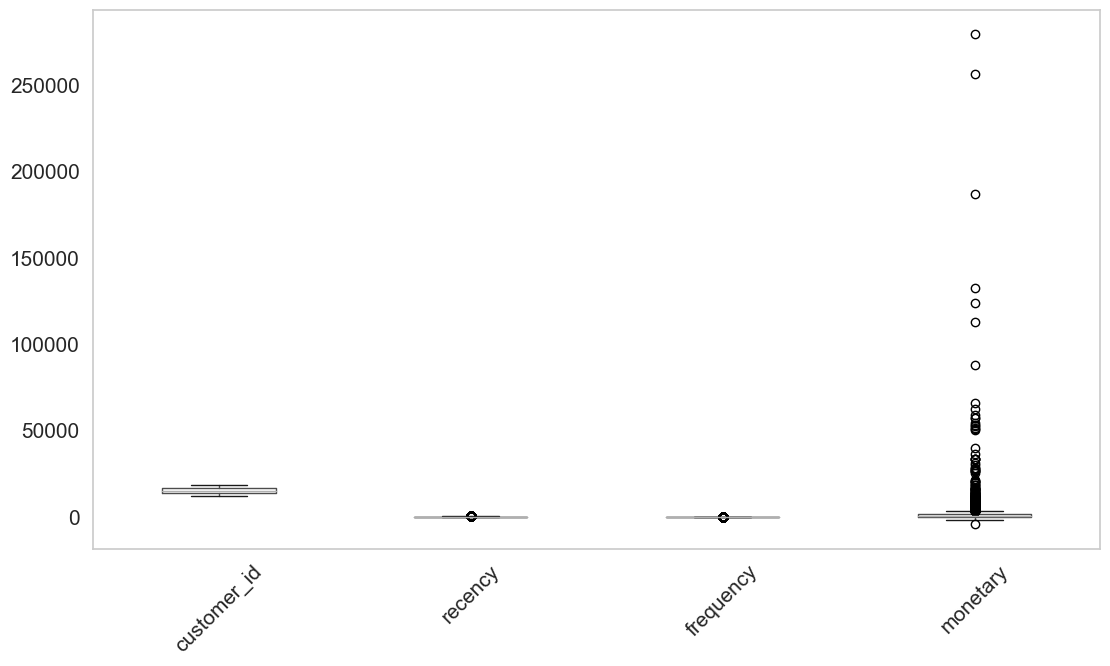

In [71]:
#plot Box Plot

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(13, 7))


rfm.boxplot(grid=False,fontsize=15,rot=45)
plt.show()

In [60]:
# Below are top ten customers after sorting¶

rfm.sort_values(['frequency', 'monetary'], ascending=[False, False], inplace=True)
rfm.head()

,customer_id,recency,frequency,monetary
1895,14911.0,2,248,132458.73
330,12748.0,1,224,28405.56
4042,17841.0,2,169,39869.05
1674,14606.0,2,128,11633.35
2192,15311.0,1,118,59284.19


In [72]:
rfm_new1= rfm.copy()

## **calculate RFM Score**

In [74]:
# i use the method qcut, in order to cut the three columns in five quartiles. 

rfm['recency_score'] = pd.qcut(rfm['recency'] , 5 , labels = range(1,6,1))

rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels =range(1, 6, 1) )

rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels= range(1, 6, 1))

rfm['RFM_Score'] = rfm[['recency_score', 'frequency_score', 'monetary_score']].sum(axis=1).astype(int)

rfm['RFM_Segmentantion'] = (rfm['recency_score'].astype(str) 
                            + rfm['frequency_score'].astype(str) 
                            + rfm['monetary_score'].astype(str))

In [75]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,RFM_Segmentantion
1895,14911.0,2,248,132458.73,1,5,5,11,155
330,12748.0,1,224,28405.56,1,5,5,11,155
4042,17841.0,2,169,39869.05,1,5,5,11,155
1674,14606.0,2,128,11633.35,1,5,5,11,155
2192,15311.0,1,118,59284.19,1,5,5,11,155


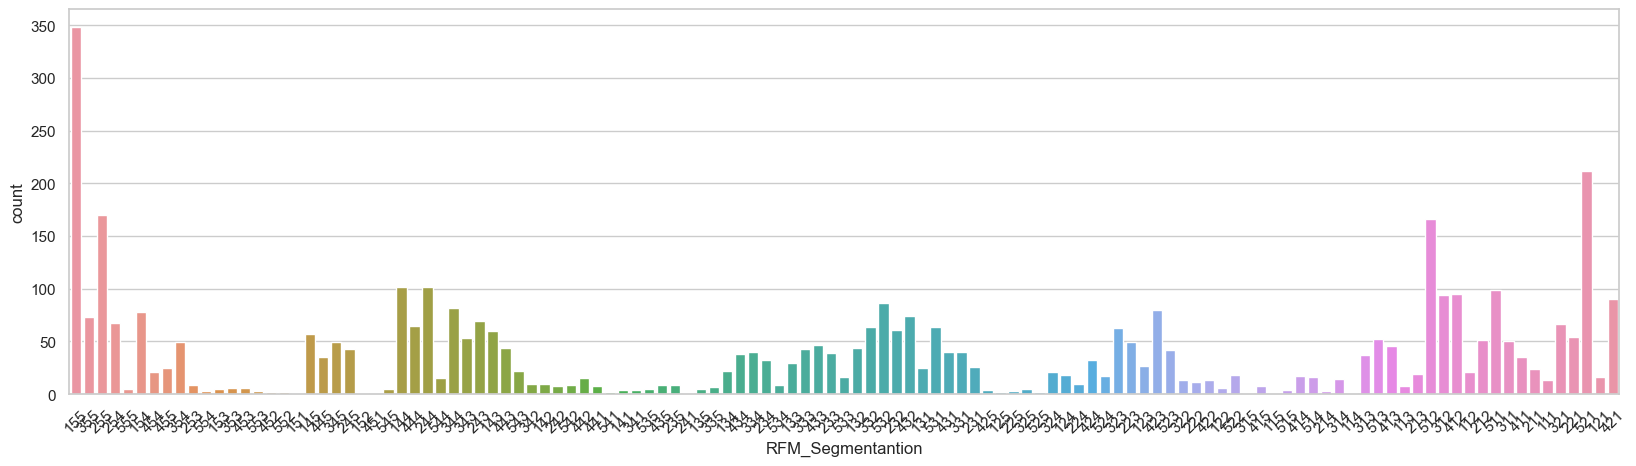

In [77]:
#Plot Count Plot
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 5))

sns.countplot(x="RFM_Segmentantion", data=rfm)
plt.xticks(rotation=45)

plt.show()

In [79]:
# Create a new column accordingly to the customers score 

def rank(a):
    
    if  (a >= 0) & (a <= 3):
        return 'Basic'
    
    elif (a <=7):
        return 'Advanced'
    
    elif (a <= 13):
        return 'Gold'
    else:
        return 'Platinum'

In [80]:
rfm['Rank_id'] = rfm['RFM_Score'].apply(rank)
rfm.head(10).reset_index()

,index,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,RFM_Segmentantion,Rank_id
0,1895,14911.0,2,248,132458.73,1,5,5,11,155,Gold
1,330,12748.0,1,224,28405.56,1,5,5,11,155,Gold
2,4042,17841.0,2,169,39869.05,1,5,5,11,155,Gold
3,1674,14606.0,2,128,11633.35,1,5,5,11,155,Gold
4,2192,15311.0,1,118,59284.19,1,5,5,11,155,Gold
5,568,13089.0,3,118,57322.13,1,5,5,11,155,Gold
6,487,12971.0,4,89,10930.26,1,5,5,11,155,Gold
7,1615,14527.0,3,86,7709.69,1,5,5,11,155,Gold
8,803,13408.0,2,81,27487.41,1,5,5,11,155,Gold
9,1703,14646.0,2,77,279489.02,1,5,5,11,155,Gold


In [81]:
#customer by ranks

ranks = rfm['Rank_id'].value_counts()
ranks

Gold        3192
Advanced    1129
Platinum      38
Basic         13
Name: Rank_id, dtype: int64

In [83]:
rfm = rfm.drop(['customer_id'], axis = 1)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,RFM_Segmentantion,Rank_id
1895,2,248,132458.73,1,5,5,11,155,Gold
330,1,224,28405.56,1,5,5,11,155,Gold
4042,2,169,39869.05,1,5,5,11,155,Gold
1674,2,128,11633.35,1,5,5,11,155,Gold
2192,1,118,59284.19,1,5,5,11,155,Gold


In [85]:
rfm.dropna(inplace = True)
rfm.isnull().sum()

recency              0
frequency            0
monetary             0
recency_score        0
frequency_score      0
monetary_score       0
RFM_Score            0
RFM_Segmentantion    0
Rank_id              0
dtype: int64